# Introduction to Machine Learning

## Content:

### 1. Definition
### 2. Data Science Pipeline
### 3. Basic Paradigm
### 4. Supervised versus Unsupervised Learning


## 1. Definition

- "Machine Learning is the field of study that gives computers the ability to learn without being explicitly programmed"

<div style="font-size: 9pt; text-align: right"> Arthur Samuel (1959).
Computer pioneer who wrote the first self-learning program, wich played checkers - learned from experience.</div>


<img src='Data/traditional_programming.png'>
<img src='Data/machine_learning.png'>

These ability to learn things, which tries to imitate the way humans learn, are primary through memorization or generalization.

<strong style="font-size: 12pt"> Memorization</strong>
   - Acumulation of individual facts <strong style="font-size: 12pt; color: blue; "> Declarative knowledge</strong>
   - Limited by time to observe facts and memory to store facts       

<strong style="font-size: 12pt"> Generalization</strong>
   - Deduce new facts from old facts <strong style="font-size: 12pt; color: blue; "> Imperative knowledge</strong>
   - Limited by accuracy of deduction process
   - Essentially a predictive activity
   - Assumes that the past predicts the future in some magnitude

## 2. Data Science Pipeline



<img src='Data/pipeline.png'/>


- **Question**: problem you want to solve with data science
- **Data Wrangling**: process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable.
- **Data cleansing**: process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database. Refers to indentifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing.
- **Data exploration**: approach whereby a data analyst uses visual exploration to understand what is in a dataset and the characteristics of the data.
- **Data preprocessing**: is the step in which the data gets transformed, or Encoded, to bring it to such a state that now the machine can easily parse it. Handle null values, multicollinearity, categorical variables and perform standardization of features are commom in the preprocessing step.
- **Data modeling**: decision-making process whereby the data scientist must choose a model that best suit the data set and will probably explain data behavior.
- **Model validation**: process where a trained model is evaluated with a testing data set.
- **Tell a story**: you must find a structured approach of communicating insights from data through stories and visuals to an audience.


## 3. Basic Paradigm

- Observe a set of examples <strong style="font-size: 12pt; color: red; "> training data</strong>
- Infer something about process that generated that data
- Use inference to make predictions abou previously unseen data <strong style="font-size: 12pt; color: red; "> test data</strong>

- Variations on paradigm:
    - **Supervised:** given a set of feature/label pairs, find a rule that predicts the label associated with a previously unseen input.
    - **Unsupervised:** given a set of feature vectors (without labels) group them into "natural clusters" (or create labels for groups).

### Given the set of players of the 2018 World Cup German team, labeled by position, with height and weight data, find a canonical model of position (for defenders and midfielders) and predict the position of new players.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

df_players = pd.read_csv('Data/players.csv', sep=';')
df_players = df_players.set_index('#')
df_players



,Position,FIFA Popular Name,Height,Weight
#,,,,
1,GK,NEUER Manuel,193,93
2,DF,PLATTENHARDT Marvin,181,76
3,DF,HECTOR Jonas,185,75
4,DF,GINTER Matthias,189,85
5,DF,HUMMELS Mats,192,90
6,DF,KHEDIRA Sami,189,81
7,MF,DRAXLER Julian,185,74
8,MF,KROOS Toni,182,78
9,FW,WERNER Timo,181,75


In [5]:
## First lets use a training dataset

training = df_players.filter(items=[2,5,6,7,8,13,14,15,16], axis= 0)
test = df_players.filter(items=[4, 19, 20, 21, 2, 3, 17, 18, 10], axis=0)


In [6]:
training

,Position,FIFA Popular Name,Height,Weight
#,,,,
2,DF,PLATTENHARDT Marvin,181,76
5,DF,HUMMELS Mats,192,90
6,DF,KHEDIRA Sami,189,81
7,MF,DRAXLER Julian,185,74
8,MF,KROOS Toni,182,78
13,MF,MUELLER Thomas,186,75
14,MF,GORETZKA Leon,189,76
15,DF,SUELE Niklas,195,89
16,DF,RUEDIGER Antonio,191,85


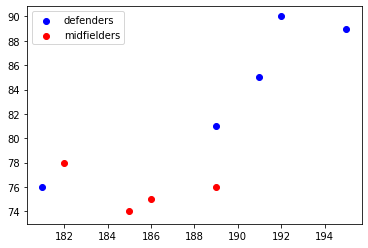

In [7]:
fig, ax = plt.subplots()
defenders = training[training['Position'] == 'DF']
midfielders = training[training['Position'] == 'MF']
ax.scatter(defenders['Height'],defenders['Weight'], label='defenders',c='blue')
ax.scatter(midfielders['Height'],midfielders['Weight'], label='midfielders', c='red')
ax.legend()

We can see, that to these data, cleary the height and the weight of the defenders are much bigger, we can than trace a number of lines at the plot separating those two groups. That would be our 1st canonichal model for this task:

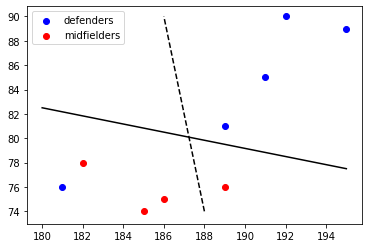

In [8]:
fig, ax = plt.subplots()
ax.scatter(defenders['Height'],defenders['Weight'], label='defenders',c='blue')
ax.scatter(midfielders['Height'],midfielders['Weight'], label='midfielders', c='red')
p1= [195,77.5]
p2= [180,82.5]
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], c='black')
p3= [188,74]
p4= [186, 90]
ax.plot([p3[0], p4[0]], [p3[1], p4[1]], c='black', linestyle= '--')
ax.legend()

So, we will at first two options for our first canonical model:
 - Model 1: Our first canonical model of a program will be a program that states that every player above the black line is a defender and every player below the black line is a midfielder.
 - Model 2: Or our first canonical model will be a program that states that every player right of the the dashed line is a defender and every player left from the dashed line is a midfielder.

We can then take a look at the training accuracy of the models using a so called Confusion Matrix:

\begin{equation*}
accuracy =
\frac{true\,\ positive + true\,\ negative}{true\,\ positive + true\,\ negative, false\,\ positive + false\,\ negative},
\end{equation*}

<img src='Data/training_accuracy.png'>

\begin{equation*}
accuracy_{model1} =0.89
\end{equation*}

$$
\begin{equation*}
accuracy_{model2} =0.78
\end{equation*}
$$




We choose model 1 as our first canonical model., through its higher accuracy in the training data. That, however, doesn't me that this is the best model.

This model is also capable of infer about the tendency of a performance of a forward out of his position (wheter midfielder or defender). This doesn't mean that the model will be right, but at least will state something through a classification method. Lets see that working testing both Marco Reus and Mario Gomez.

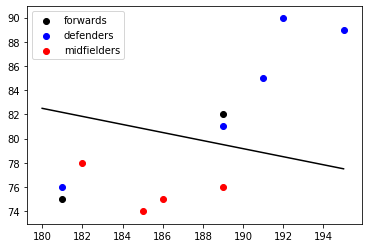

In [9]:
fig, ax = plt.subplots()
defenders = training[training['Position'] == 'DF']
midfielders = training[training['Position'] == 'MF']
forwards =  df_players.filter(items=[9,23], axis= 0) ##choosing Reus and Gomer
p1= [195,77.5]
p2= [180,82.5]
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], c='black')
ax.scatter(forwards['Height'],forwards['Weight'], label='forwards', c='black')
ax.scatter(defenders['Height'],defenders['Weight'], label='defenders',c='blue')
ax.scatter(midfielders['Height'],midfielders['Weight'], label='midfielders', c='red')
ax.legend()


As you can see, our model gives our first output, as it is stating that Reus would be more suited to the midfielder position and that Gomez to the defender position.

We can then, test the accuracy of our model using a test dataset:



In [10]:
test

,Position,FIFA Popular Name,Height,Weight
#,,,,
4,DF,GINTER Matthias,189,85
19,MF,RUDY Sebastian,179,74
20,MF,BRANDT Julian,183,82
21,MF,GUENDOGAN Ilkay,180,79
2,DF,PLATTENHARDT Marvin,181,76
3,DF,HECTOR Jonas,185,75
17,DF,BOATENG Jerome,192,90
18,DF,KIMMICH Joshua,176,72
10,MF,OEZIL Mesut,180,70


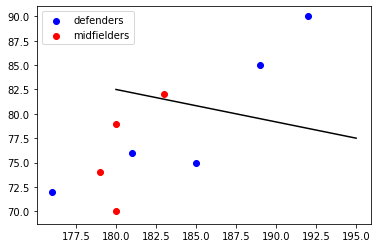

In [11]:
fig, ax = plt.subplots()
defenders = test[test['Position'] == 'DF']
midfielders = test[test['Position'] == 'MF']
ax.scatter(defenders['Height'],defenders['Weight'], label='defenders',c='blue')
ax.scatter(midfielders['Height'],midfielders['Weight'], label='midfielders', c='red')
p1= [195,77.5]
p2= [180,82.5]
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], c='black')
ax.legend()

<img src='Data/test_accuracy.png'>

As the test accuracy falls almost 40% to 0.56, we can now try to find a better canonical model to the given problem.
We have other statistical measures as well, e.g., positive predictive value, sensitivity and specificity.

\begin{equation*}
positive\,\  predictive\,\ value =
\frac{true\,\ positive }{true\,\ positive, false\,\ positive}
\end{equation*}

\begin{equation*}
sensitivity =
\frac{true\,\ positive }{true\,\ positive, false\,\ positive}
\quad\ Percentage\,\ correctly\,\ found
\end{equation*} 

\begin{equation*}
specificity =
\frac{true\,\ negative }{true\,\ negative, false\,\ negative}
\quad\ Percentage\,\ correctly\,\ rejected
\end{equation*} 


## Exercise 1
Would a curve like this povide a better model? Find a canonical linear model with higher accuracy with testing dataset.

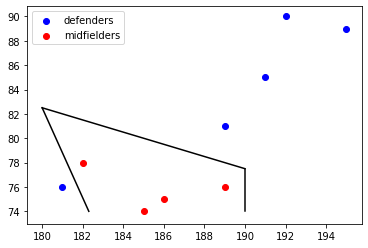

In [20]:
fig, ax = plt.subplots()
defenders = training[training['Position'] == 'DF']
midfielders = training[training['Position'] == 'MF']
ax.scatter(defenders['Height'],defenders['Weight'], label='defenders',c='blue')
ax.scatter(midfielders['Height'],midfielders['Weight'], label='midfielders', c='red')
p1= [190,77.5]
p2= [180,82.5]
p3= [190, 74]
p4= [182.3, 74]
ax.plot([p1[0], p2[0]], [p1[1], p2[1]], c='black')
ax.plot([p4[0], p2[0]], [p4[1], p2[1]], c='black')
ax.plot([p1[0], p3[0]], [p1[1], p3[1]], c='black')
ax.legend()

## 4. Supervised versus Unsupervised Learning

 - **Supervised Learning:** uses labeled data and creates classifiers that optimally separate data into known classes. When given labeled data, the supervised learning aims to lear a mathematical surface that "best" separates labeled examples, subject to constraints on complexity of surface (watch out to not over fit).
 
     The classification method used in the first example is, therefore, supervised.
     
     `Classification approaches:`
     
     `When trying to find boundaries in feature space that saparete different classes of labeled examples do:`
         - Look for simple surface (e.g. best line or plane) that separates classes
         - Look for more complex surfaces that separates classes
         - Find k nearest training examples
         
       
     Methods:
     - K-Nearest Neighbors
     - Support Vector Machines
     - Decision Tree Classifiers
     - Random Forests
     - Naive Bayes
     - Linear Discriminant Analysis
     - Logistic Regression
    

 - **Unspervised Learning:** tries to infer latent variables by clustering training examples into nearby groups. When given unlabeled data, tries to find clusters of examples near each other, generally using centroids of clusters as definition of each learned class. New data should be assigned to closest cluster. 
     
      `Clustering approaches:`
     
     `Supposing we know that there are k different groups in our training data and don't know any labels:`
         - Pick k samples as exemplars.
         - Cluster remaining samples by minimiying distance between samples in same cluster (objective function), i.e. put the samples in group with closest exemplar.
         - Find median example in each cluster as new exemplar
         - Repeat until no change
     
     Methods:
     - Hierarchical clustering
     - K-means clustering
     - DBSCAN - Density-based spatial clustering of applications with noise
      
     
All of these (and many others) pseudo algorithms could be used to code all the functions and methods from scratch. Luckly we will use a python library regarding this matter.

**Scikit-learn:** is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including `support vector machines, random forests, gradient boosting, k-means and DBSCAN`, and is designed to interoperate with the Python numerical and scientific libraries NumPy, SciPy and Pandas.

### Metrics for regression models

**1. R-squared score:** Proportion of variation in the outcome that is explained by the predictor variables, i.e. (total variance explained by model)/(total variance). In multiple regression models, R2 corresponds to the squared correlation between the observed outcome values and the predicted values by the model. The Higher the R-squared, the better the model.
    
**2. Mean Standard Error (MSE):**  Measures the average of the squares of the errors, i.e. the average squared difference between the estimated values and the actual value.

**3. Root Mean Squared Error (RMSE):** Measures the average error performed by the model in predicting the outcome for an observation. Mathematically, the RMSE is the square root of the mean squared error (MSE), which is the average squared difference between the observed actual outome values and the values predicted by the model. So, MSE = mean((observeds - predicteds)^2) and RMSE = sqrt(MSE). The lower the RMSE, the better the model.


    
    

### Regression example

In [2]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

reg = linear_model.LinearRegression()
ar = np.array([[[1],[2],[3]], [[2.01],[4.03],[6.04]]])
y = ar[1,:]
x = ar[0,:]
reg.fit(x,y)
print('Coefficients: \n', reg.coef_)
xTest = np.array([[4],[5],[6]])
ytest =  np.array([[9],[8.5],[14]])

preds = reg.predict(xTest)
print("R2 score : %.2f" % r2_score(ytest,preds))
print("Mean squared error: %.2f" % mean_squared_error(ytest,preds))

er = []
g = 0
for i in range(len(ytest)):
    print( "actual=", ytest[i], " observed=", preds[i])
    x = (ytest[i] - preds[i]) **2
    er.append(x)
    g = g + x
    
x = 0
for i in range(len(er)):
   x = x + er[i]

print ("MSE", x / len(er))

v = np.var(er)
print ("variance", v)

print ("average of errors ", np.mean(er))

m = np.mean(ytest)
print ("average of observed values", m)

y = 0
for i in range(len(ytest)):
    y = y + ((ytest[i] - m) ** 2)

print ("total sum of squares", y)
print ("ẗotal sum of residuals ", g)
print ("r2 calculated", 1 - (g / y))

Coefficients: 
 [[2.015]]
R2 score : 0.62
Mean squared error: 2.34
actual= [9.]  observed= [8.05666667]
actual= [8.5]  observed= [10.07166667]
actual= [14.]  observed= [12.08666667]
MSE [2.34028611]
variance 1.2881398892129672
average of errors  2.340286111111112
average of observed values 10.5
total sum of squares [18.5]
ẗotal sum of residuals  [7.02085833]
r2 calculated [0.62049414]


### Classification example: recognizing hand-written digits

Automatically created module for IPython interactive environment


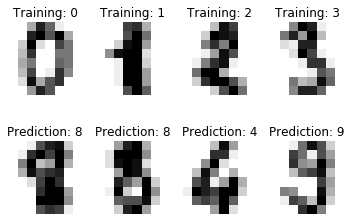

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

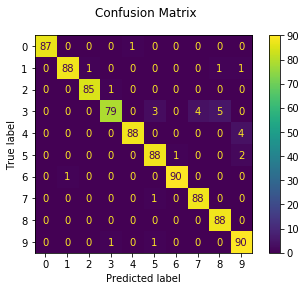

In [3]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

plt.show()

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

### Clustering Example: Kmeans Algorithm

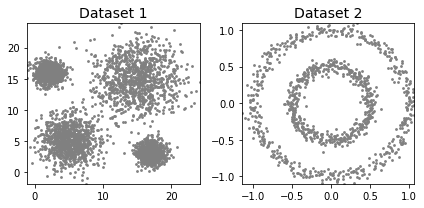

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph

np.random.seed(844)
clust1 = np.random.normal(5, 2, (1000,2))
clust2 = np.random.normal(15, 3, (1000,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], 1000)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], 1000)
dataset1 = np.concatenate((clust1, clust2, clust3, clust4))

# we take the first array as the second array has the cluster labels
dataset2 = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)[0]

# plot clustering output on the two datasets
def cluster_plots(set1, set2, colours1 = 'gray', colours2 = 'gray', 
                  title1 = 'Dataset 1',  title2 = 'Dataset 2'):
    fig,(ax1,ax2) = plt.subplots(1, 2)
    fig.set_size_inches(6, 3)
    ax1.set_title(title1,fontsize=14)
    ax1.set_xlim(min(set1[:,0]), max(set1[:,0]))
    ax1.set_ylim(min(set1[:,1]), max(set1[:,1]))
    ax1.scatter(set1[:, 0], set1[:, 1],s=8,lw=0,c= colours1)
    ax2.set_title(title2,fontsize=14)
    ax2.set_xlim(min(set2[:,0]), max(set2[:,0]))
    ax2.set_ylim(min(set2[:,1]), max(set2[:,1]))
    ax2.scatter(set2[:, 0], set2[:, 1],s=8,lw=0,c=colours2)
    fig.tight_layout()
    plt.show()

cluster_plots(dataset1, dataset2)

'<img src="Data/Kmeans.gif"/>

Dataset1
Cluster 0: 952
Cluster 1: 1022
Cluster 2: 1018
Cluster 3: 1008


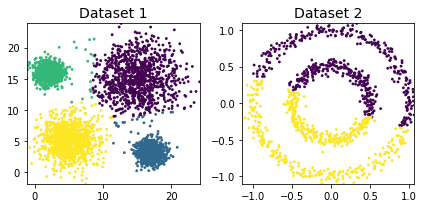

In [14]:
# implementing k-means clustering
kmeans_dataset1 = cluster.KMeans(n_clusters=4, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset1)
kmeans_dataset2 = cluster.KMeans(n_clusters=2, max_iter=300, 
                                 init='k-means++',n_init=10).fit_predict(dataset2)
print('Dataset1')
print(*["Cluster "+str(i)+": "+ str(sum(kmeans_dataset1==i)) for i in range(4)], sep='\n')
cluster_plots(dataset1, dataset2, 
              kmeans_dataset1, kmeans_dataset2)

K-means performs quite well on `Dataset1`, but fails miserably on `Dataset2`. In fact, these two datasets illustrate the strenghts and weaknesses of k-means. The algorithm seeks and identifies globular (essentially spherical) clusters. If this assumption doesn’t hold, the model output may be inadaquate (or just really bad).

## Exercise 2

This program can predict the series number of the product in the file `Data/mechanical_setup.csv` using k-Nearest Neighbors Algorithm. Was all the data science pipeline steps performed? Perform the steps that weren't made.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Importing the dataset

df= pd.read_csv('Data/mechanical_setup.csv')
df = df.set_index('Product_No').sort_values('Product_No')
df = df.filter(items=['Product_No', 'Series_No', 'Turning_Cut_Depth', 'Milling_Gear_Depth', 'Drilling_Surf_Quality', 'Drill_Pressure'])

#Preprocessing

x = df.iloc[:,1:5].values # x contains the last 4 columns of the dataset
y = df.iloc[:,0].values # y contains the labels

#Train Test Split

#The above script splits the dataset into 80% train data and 20% test data. 
#This means that out of total 10000 records, the training set will contain 8000 records 
#and the test set contains 2000 of those records.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20) 

#Feature Scaling

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#Training and Predictions

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

#Evaluating the Algorithm through the confusion matrix

print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[647   7  59]
 [  8 578  40]
 [ 45  27 589]]
              precision    recall  f1-score   support

  WK00001576       0.92      0.91      0.92       713
  XK00001402       0.94      0.92      0.93       626
  YZ00001723       0.86      0.89      0.87       661

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



### Kmeans Algorithm for clustering



## Exercise 3

Out of the file `Data/mechanical_setup.csv`, build a program that can predict the series number of the product, using Support Vector Machines Algorithm. Watch out for scaling the data!

## Exercise 4

Out of the file `Data/mechanical_setup.csv`, build a program that can predict the series number of the product, using Logistic Regression.

## Exercise 5

Out of the file `Data/mechanical_setup.csv`, build a program that can predict the series number of the product, using Naive Bayes.

## REFERENCES:
- https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/lecture-slides-and-files/MIT6_0002F16_lec11.pdf
- https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-0002-introduction-to-computational-thinking-and-data-science-fall-2016/lecture-slides-and-files/MIT6_0002F16_lec12.pdf
- https://img.fifa.com/image/upload/hzfqyndmnqazczvc5xdb.pdf
- https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
- https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
- https://www.youtube.com/watch?v=cugl5t-W1sE
- https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
- https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/